In [1]:
suppressPackageStartupMessages({
    library(edgeR)
    library(dplyr)
    library(ggplot2)
    library(reshape2) 
})

## Download counts

In [2]:
# URL of the compressed file
url <- "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE179nnn/GSE179487/suppl/GSE179487_FINAL_master_list_of_gene_counts_MIN.Fastqs.txt.gz"

# Download the compressed file to a temporary location
temp_compressed <- tempfile(fileext = ".gz")
download.file(url, temp_compressed)

# Decompress the file
temp_decompressed <- tempfile()
gzfile <- gzfile(temp_compressed, "rb")
writeLines(readLines(gzfile), temp_decompressed)
close(gzfile)

## View raw data

In [3]:
# Counts
counts <- read.table(temp_decompressed, header = TRUE)
rownames(counts) <- make.unique(counts$geneSymbol)
counts$geneSymbol <- NULL
counts$id <- NULL
counts$geneCoordinate <- NULL
colnames(counts) <- sub(pattern = "^X", replacement = "", colnames(counts))
head(counts)

,19616.021_HiHi_oW_S17,19616.022_ABC_oW_S20,19616.022_HiHi_oW_S21,19616.022_naiveB_oW_S19,19616.023_HiHi_bL_S15,19616.023_HiHi_oW_S18,19616.025_ABC_oW_S27,19616.025_HiHi_oW_S29,19616.025_naiveB_oW_S26,19616.025_PB_oW_S28,⋯,FS1819.131_ABC_bL_S2,FS1819.131_HiHi_bL_S3,FS1819.131_HiHi_oW_S10,FS1819.131_naiveB_bL_S1,FS1819.131_naiveB_oW_S8,FS1819.131_PB_oW_S9,FS1819.999_ABC_bL_S5,FS1819.999_HiHi_bL_S7,FS1819.999_naiveB_bL_S4,FS1819.999_PB_bL_S6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TSPAN6,0,0,0,0,0,1,0,2,0,3,⋯,2,4,17,1,3,1,0,1,0,0
DPM1,191,113,181,87,221,163,117,142,86,114,⋯,161,168,99,100,91,85,92,179,94,137
SCYL3,8,21,21,8,52,24,38,18,19,19,⋯,60,16,10,14,16,26,53,19,13,14
C1orf112,5,1,3,4,16,7,8,5,0,5,⋯,1,4,0,2,4,0,4,2,0,13
FGR,125,299,51,457,57,0,794,476,78,637,⋯,330,108,722,433,492,695,233,303,338,495
CFH,0,0,2,0,0,3,0,1,0,0,⋯,0,0,0,1,0,6,0,1,0,0


In [4]:
# Create a box plot
counts_mat <- as.matrix(counts)
box_plot <- ggplot(data = melt(counts_mat), aes(x = Var2, y = value)) +
  geom_boxplot() +
  labs(x = "Samples", y = "Counts") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + # Rotate x-axis labels for better readability
  ggtitle("Box Plot of Counts Matrix")

# Compute summary statistics
summary_stats <- apply(counts_mat, 2, summary)
formatted_summary <- t(round(summary_stats, 2)) 

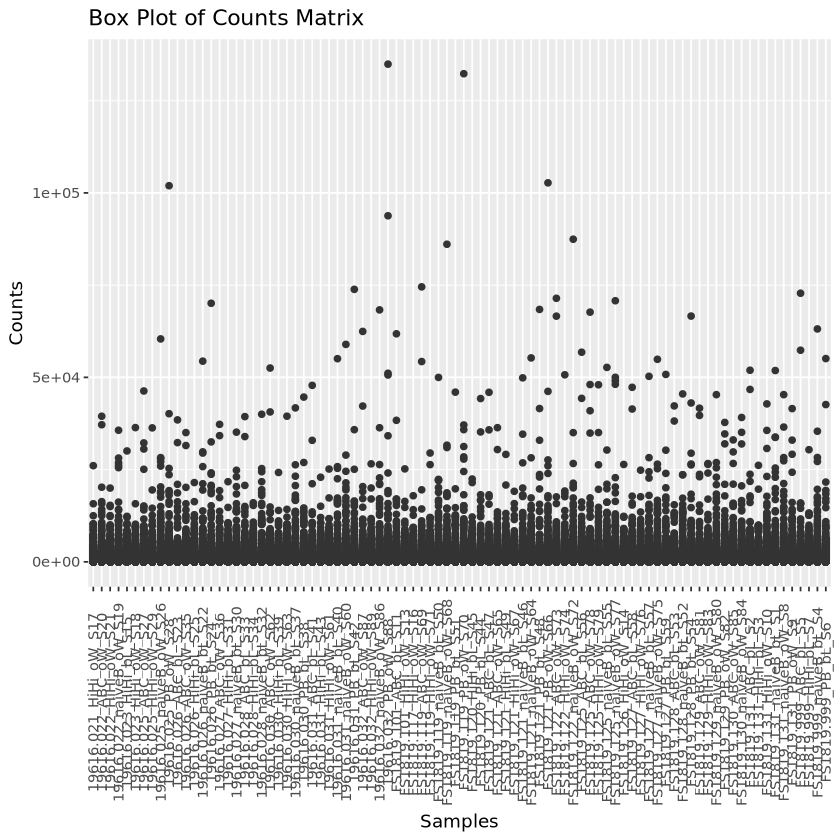

In [5]:
box_plot

In [6]:
print(knitr::kable(formatted_summary, caption = "Summary Statistics", align = "c"))



Table: Summary Statistics

|                         | Min. | 1st Qu. | Median | Mean  | 3rd Qu. |  Max.  |
|:------------------------|:----:|:-------:|:------:|:-----:|:-------:|:------:|
|19616.021_HiHi_oW_S17    |  0   |    0    |   0    | 50.63 |    6    | 26069  |
|19616.022_ABC_oW_S20     |  0   |    0    |   0    | 51.65 |    7    | 39468  |
|19616.022_HiHi_oW_S21    |  0   |    0    |   0    | 50.46 |    7    | 20002  |
|19616.022_naiveB_oW_S19  |  0   |    0    |   0    | 50.79 |    6    | 35672  |
|19616.023_HiHi_bL_S15    |  0   |    0    |   0    | 50.81 |    6    | 30064  |
|19616.023_HiHi_oW_S18    |  0   |    0    |   0    | 50.82 |    6    | 36391  |
|19616.025_ABC_oW_S27     |  0   |    0    |   0    | 50.99 |    7    | 46313  |
|19616.025_HiHi_oW_S29    |  0   |    0    |   0    | 50.73 |    9    | 36316  |
|19616.025_naiveB_oW_S26  |  0   |    0    |   0    | 51.97 |    6    | 60430  |
|19616.025_PB_oW_S28      |  0   |    0    |   0    | 53.32 |    8    | 101951 |

In [7]:
# Metadata
metadata <- read.delim("metadata.txt")
head(metadata)

,id,Sample_title,Sample_geo_accession,Time_Point,condition,Cell_Type
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,19616.021_HiHi_oW_S17,anti-PD1-treated adult 1_HiHi_oW,GSM5419198,1 Week,anti-PD1,ICOS+CD38+ cTfh
2,19616.022_ABC_oW_S20,anti-PD1-treated adult 2_ABC_oW,GSM5419199,1 Week,anti-PD1,Activated B cells
3,19616.022_HiHi_oW_S21,anti-PD1-treated adult 2_HiHi_oW,GSM5419200,1 Week,anti-PD1,ICOS+CD38+ cTfh
4,19616.022_naiveB_oW_S19,anti-PD1-treated adult 2_naiveB_oW,GSM5419201,1 Week,anti-PD1,Naïve B cells
5,19616.023_HiHi_bL_S15,anti-PD1-treated adult 3_HiHi_bL,GSM5419202,0 Week (Baseline),anti-PD1,ICOS+CD38+ cTfh
6,19616.023_HiHi_oW_S18,anti-PD1-treated adult 3_HiHi_oW,GSM5419203,1 Week,anti-PD1,ICOS+CD38+ cTfh


## Normalize data

In [8]:
dgeFull1 = DGEList(counts = counts, group = metadata$condition)
dim(dgeFull1)

[1] 39647    88

In [9]:
dgeFull1 <- calcNormFactors(dgeFull1, method="TMM")
head(dgeFull1$samples)

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
19616.021_HiHi_oW_S17,anti-PD1,2007386,1.1413193
19616.022_ABC_oW_S20,anti-PD1,2047668,1.0169182
19616.022_HiHi_oW_S21,anti-PD1,2000460,1.1515647
19616.022_naiveB_oW_S19,anti-PD1,2013566,0.9163505
19616.023_HiHi_bL_S15,anti-PD1,2014385,1.1939077
19616.023_HiHi_oW_S18,anti-PD1,2015054,1.2828112


In [10]:
eff.lib.size0 <- dgeFull1$samples$lib.size*dgeFull1$samples$norm.factors
analysis <- data.frame(cpm(dgeFull1))
colnames(analysis) <- sub(pattern = "^X", replacement = "", colnames(analysis))
analysis <-as.matrix(analysis)
head(analysis)

,19616.021_HiHi_oW_S17,19616.022_ABC_oW_S20,19616.022_HiHi_oW_S21,19616.022_naiveB_oW_S19,19616.023_HiHi_bL_S15,19616.023_HiHi_oW_S18,19616.025_ABC_oW_S27,19616.025_HiHi_oW_S29,19616.025_naiveB_oW_S26,19616.025_PB_oW_S28,⋯,FS1819.131_ABC_bL_S2,FS1819.131_HiHi_bL_S3,FS1819.131_HiHi_oW_S10,FS1819.131_naiveB_bL_S1,FS1819.131_naiveB_oW_S8,FS1819.131_PB_oW_S9,FS1819.999_ABC_bL_S5,FS1819.999_HiHi_bL_S7,FS1819.999_naiveB_bL_S4,FS1819.999_PB_bL_S6
TSPAN6,0.000000,0.0000000,0.000000,0.000000,0.000000,0.3868571,0.000000,0.8838670,0.000000,1.555876,⋯,0.9970479,1.641666,9.049564,0.5072453,1.570383,0.5238893,0.000000,0.4144265,0.00000,0.000000
DPM1,83.367218,54.2666319,78.570656,47.151092,91.892284,63.0577076,60.259129,62.7545543,45.058806,59.123287,⋯,80.2623566,68.949984,52.700403,50.7245319,47.634939,44.5305864,42.841319,74.1823496,48.34608,68.623227
SCYL3,3.491821,10.0849493,9.115932,4.335733,21.621714,9.2845705,19.571341,7.9548027,9.954853,9.853881,⋯,29.9114372,6.566665,5.323273,7.1014345,8.375374,13.6211205,24.680325,7.8741041,6.68616,7.012593
C1orf112,2.182388,0.4802357,1.302276,2.167866,6.652835,2.7079997,4.120282,2.2096674,0.000000,2.593127,⋯,0.4985240,1.641666,0.000000,1.0144906,2.093843,0.0000000,1.862666,0.8288531,0.00000,6.511693
FGR,54.559698,143.5904686,22.138693,247.678726,23.700725,0.0000000,408.938021,210.3603369,40.867289,330.364334,⋯,164.5129048,44.324990,384.340312,219.6372229,257.542744,364.1030298,108.500297,125.5712398,173.84017,247.945237
CFH,0.000000,0.0000000,0.868184,0.000000,0.000000,1.1605713,0.000000,0.4419335,0.000000,0.000000,⋯,0.0000000,0.000000,0.000000,0.5072453,0.000000,3.1433355,0.000000,0.4144265,0.00000,0.000000


## View normalized data

In [11]:
# Create a box plot
counts_mat <- analysis
box_plot <- ggplot(data = melt(counts_mat), aes(x = Var2, y = value)) +
  geom_boxplot() +
  labs(x = "Samples", y = "Counts") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + # Rotate x-axis labels for better readability
  ggtitle("Box Plot of Counts Matrix")

# Compute summary statistics
summary_stats <- apply(counts_mat, 2, summary)
formatted_summary <- t(round(summary_stats, 2)) 

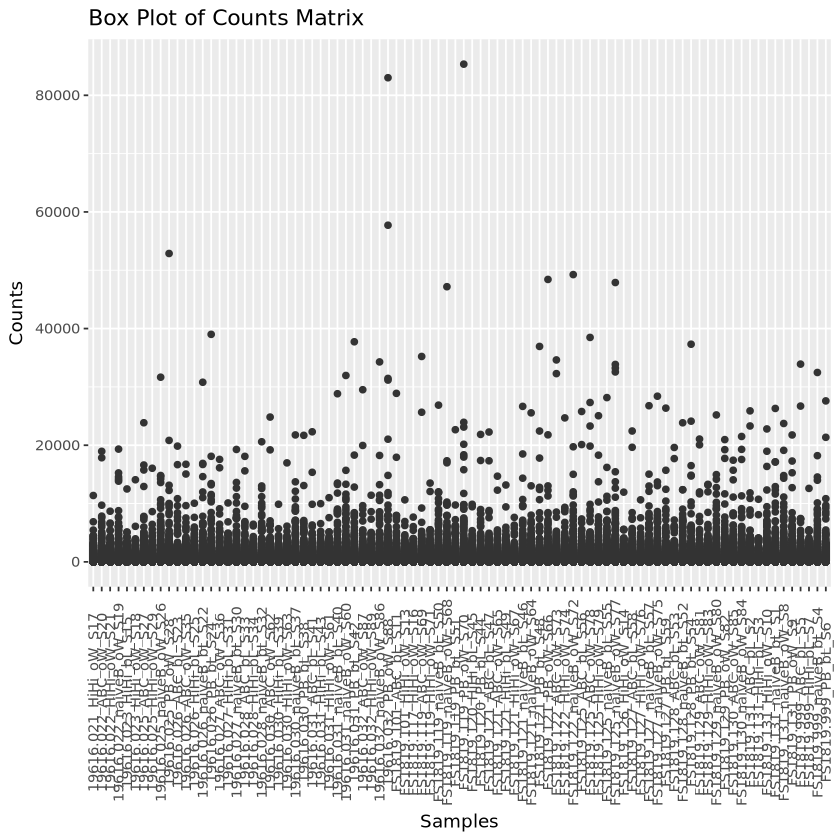

In [12]:
box_plot

In [13]:
print("Summary Statistics:")
print(knitr::kable(formatted_summary, caption = "Summary Statistics", align = "c"))

[1] "Summary Statistics:"


Table: Summary Statistics

|                         | Min. | 1st Qu. | Median | Mean  | 3rd Qu. |   Max.   |
|:------------------------|:----:|:-------:|:------:|:-----:|:-------:|:--------:|
|19616.021_HiHi_oW_S17    |  0   |    0    |   0    | 22.10 |  2.62   | 11378.53 |
|19616.022_ABC_oW_S20     |  0   |    0    |   0    | 24.80 |  3.36   | 18953.94 |
|19616.022_HiHi_oW_S21    |  0   |    0    |   0    | 21.90 |  3.04   | 8682.71  |
|19616.022_naiveB_oW_S19  |  0   |    0    |   0    | 27.53 |  3.25   | 19333.03 |
|19616.023_HiHi_bL_S15    |  0   |    0    |   0    | 21.13 |  2.49   | 12500.68 |
|19616.023_HiHi_oW_S18    |  0   |    0    |   0    | 19.66 |  2.32   | 14078.12 |
|19616.025_ABC_oW_S27     |  0   |    0    |   0    | 26.26 |  3.61   | 23852.83 |
|19616.025_HiHi_oW_S29    |  0   |    0    |   0    | 22.42 |  3.98   | 16049.26 |
|19616.025_naiveB_oW_S26  |  0   |    0    |   0    | 27.23 |  3.14   | 31661.67 |
|19616.025_PB_oW_S28      |  0  

## Make server files

In [14]:
head(analysis)

,19616.021_HiHi_oW_S17,19616.022_ABC_oW_S20,19616.022_HiHi_oW_S21,19616.022_naiveB_oW_S19,19616.023_HiHi_bL_S15,19616.023_HiHi_oW_S18,19616.025_ABC_oW_S27,19616.025_HiHi_oW_S29,19616.025_naiveB_oW_S26,19616.025_PB_oW_S28,⋯,FS1819.131_ABC_bL_S2,FS1819.131_HiHi_bL_S3,FS1819.131_HiHi_oW_S10,FS1819.131_naiveB_bL_S1,FS1819.131_naiveB_oW_S8,FS1819.131_PB_oW_S9,FS1819.999_ABC_bL_S5,FS1819.999_HiHi_bL_S7,FS1819.999_naiveB_bL_S4,FS1819.999_PB_bL_S6
TSPAN6,0.000000,0.0000000,0.000000,0.000000,0.000000,0.3868571,0.000000,0.8838670,0.000000,1.555876,⋯,0.9970479,1.641666,9.049564,0.5072453,1.570383,0.5238893,0.000000,0.4144265,0.00000,0.000000
DPM1,83.367218,54.2666319,78.570656,47.151092,91.892284,63.0577076,60.259129,62.7545543,45.058806,59.123287,⋯,80.2623566,68.949984,52.700403,50.7245319,47.634939,44.5305864,42.841319,74.1823496,48.34608,68.623227
SCYL3,3.491821,10.0849493,9.115932,4.335733,21.621714,9.2845705,19.571341,7.9548027,9.954853,9.853881,⋯,29.9114372,6.566665,5.323273,7.1014345,8.375374,13.6211205,24.680325,7.8741041,6.68616,7.012593
C1orf112,2.182388,0.4802357,1.302276,2.167866,6.652835,2.7079997,4.120282,2.2096674,0.000000,2.593127,⋯,0.4985240,1.641666,0.000000,1.0144906,2.093843,0.0000000,1.862666,0.8288531,0.00000,6.511693
FGR,54.559698,143.5904686,22.138693,247.678726,23.700725,0.0000000,408.938021,210.3603369,40.867289,330.364334,⋯,164.5129048,44.324990,384.340312,219.6372229,257.542744,364.1030298,108.500297,125.5712398,173.84017,247.945237
CFH,0.000000,0.0000000,0.868184,0.000000,0.000000,1.1605713,0.000000,0.4419335,0.000000,0.000000,⋯,0.0000000,0.000000,0.000000,0.5072453,0.000000,3.1433355,0.000000,0.4144265,0.00000,0.000000


In [15]:
phen <- metadata %>%
    rename(
        Sample = id,
        Condition = condition
        ) %>%
    mutate(Source = 'PBMC') %>%
    select(Sample, Condition, Time_Point, Cell_Type) %>%
    mutate(across(everything(), as.character))
phen$Compare_All <- paste(phen$Condition, phen$Time_Point, phen$Cell_Type, sep = "_")
head(phen)

,Sample,Condition,Time_Point,Cell_Type,Compare_All
,<chr>,<chr>,<chr>,<chr>,<chr>
1,19616.021_HiHi_oW_S17,anti-PD1,1 Week,ICOS+CD38+ cTfh,anti-PD1_1 Week_ICOS+CD38+ cTfh
2,19616.022_ABC_oW_S20,anti-PD1,1 Week,Activated B cells,anti-PD1_1 Week_Activated B cells
3,19616.022_HiHi_oW_S21,anti-PD1,1 Week,ICOS+CD38+ cTfh,anti-PD1_1 Week_ICOS+CD38+ cTfh
4,19616.022_naiveB_oW_S19,anti-PD1,1 Week,Naïve B cells,anti-PD1_1 Week_Naïve B cells
5,19616.023_HiHi_bL_S15,anti-PD1,0 Week (Baseline),ICOS+CD38+ cTfh,anti-PD1_0 Week (Baseline)_ICOS+CD38+ cTfh
6,19616.023_HiHi_oW_S18,anti-PD1,1 Week,ICOS+CD38+ cTfh,anti-PD1_1 Week_ICOS+CD38+ cTfh


In [16]:
saveRDS(analysis, file = file.path("PBMC_RNAseq_GSE179487", "expression.rds"))
saveRDS(phen, file = file.path("PBMC_RNAseq_GSE179487", "metadata.rds"))

In [17]:
expression.mat <- readRDS(expression.mat <- file.path("PBMC_RNAseq_GSE179487", "expression.rds"))
meta.df <- readRDS(file.path("PBMC_RNAseq_GSE179487", "metadata.rds"))

In [33]:
system("R -e \"shiny::runApp('PBMC_RNAseq_GSE179487')\"")